<a href="https://colab.research.google.com/github/nithinag10/pytorch_exe/blob/master/Gradient_descent_using_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch 
from sklearn.datasets import make_classification

In [3]:
from torch.utils.data import DataLoader

In [32]:
class CustomDataset:
  def __init__(self , data, target):
    self.data = data
    self.target = target
  def __len__(self):
    return len(self.target)
  def __getitem__(self , idx):
    x = self.data[idx , :]
    y = self.target[idx]

    return {
        "x": torch.tensor(x , dtype=float),
        "y":torch.tensor(y , dtype=float)
    }

In [5]:
x_array , y_array = make_classification(n_samples=100)

In [6]:
from torch.utils.data import DataLoader

In [33]:
train_data = DataLoader(CustomDataset(x_array , y_array) , batch_size=5)

In [34]:
def model(x, w, b):
  return (torch.matmul(x , w) + b)

In [48]:
def linear_regression(dataset , epochs , learning_rate):
  w = torch.rand(20 , 1 ,dtype=float,  requires_grad=True)
  b = torch.rand(1 , dtype=float,  requires_grad = True)
  cost_list = []
  for _ in range(epochs):
    for data in train_data:
      x = data['x']
      y = data['y']
      output = model(x , w, b)
      loss = torch.mean((y - output) ** 2)
      cost_list.append(loss.item())
      loss.backward()

      with torch.no_grad():
        w = w - learning_rate * w.grad
        b = b - learning_rate * b.grad

      w.requires_grad_(True)
      b.requires_grad_(True)

  return cost_list


In [49]:
cost_list = linear_regression(train_data , 2 , 0.01)

In [50]:
cost_list

[5.43402837981804,
 1.9674662398429705,
 5.830609422267657,
 5.906971235946346,
 9.012098433926052,
 1.9788646374194951,
 4.694038162243024,
 2.464107490317268,
 6.926835686879474,
 3.2166623755370485,
 4.53303509402046,
 2.6161321884648134,
 4.889930148846221,
 3.2171121860783467,
 3.1247080816637265,
 0.7840202877148345,
 2.4814838100296526,
 2.9577139725213466,
 3.1849779222966443,
 1.686989331325612,
 1.7534535561533602,
 1.0345744258256286,
 1.8366823455870354,
 1.4813553899886114,
 3.470424654942931,
 0.6943143871530105,
 1.3429852301329306,
 0.91268067220855,
 1.7841009830522914,
 1.3239066554725303,
 1.7550912431033947,
 1.303824349726036,
 2.0303136704801075,
 1.210168410593515,
 1.1400752720509417,
 0.4507085396295114,
 1.0434874680221253,
 1.318143185113683,
 1.2543984076932173,
 0.786906823105535]

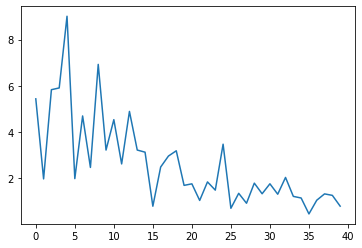

In [51]:
import matplotlib.pyplot as plt

plt.plot(range(len(cost_list)) , cost_list)